## Eric LeVally
### Lab 3

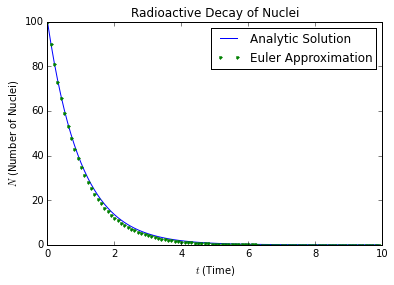

In [9]:
import math
import numpy as np
%matplotlib inline
from pylab import plot,show,ylim,xlim,xlabel,ylabel
import matplotlib.pylab as plt 


def nuclei_exact(N1,t,lamb):
    
    '''This function is used to calculate the exact number of radioactive 
    nuclei of a radioactive substance left after a specific amount of time'''
     
    N2 = N1*math.exp(-lamb*t)
    return N2

def nuclei_approx(N1,deltaT,lamb):
    
    '''This function is used to calculate the approximate number of
    radioactive nuclei of a radioactive sample remaining after a 
    specific amount of time'''
    
    N2 = -lamb*N1*deltaT+N1
    return N2

steps = 100
N1 = 100
lamb = 1
N2_exact = np.zeros(100,float)    # The empty arrays and the variables that will be used in the
N2_approx = np.zeros(100,float)   # for loops and functions.
time = np.zeros(100,float)
N2_approx[0] = 100
N2_exact[0] = 100
time[0] = 0                       # The time array for storing the values of time to graph
t = 0.1                           # at a later point.
deltaT = .1                       # How much time passes between data collection.

for i in range(1,steps):          # A for loop that generates and stores the data for future plotting
    N2 = nuclei_exact(N1,t,lamb)  # Calls the function to perform the caluclutaions
    time[i] = t  
    t += deltaT                   # Changes the value of t for each calculation
    N2_exact[i] = N2              # Stores the value of N2 in the exact array
    if N2<=0:
        break                     # Causes the loop to stop so that there are no negative values.
t = 0

for j in range(1,steps):
    N2 = nuclei_approx(N1,deltaT,lamb)
    t += deltaT
    N2_approx[j] = N2
    N1 = N2
    if N2 <= 0:
        break
        
fig, ax = plt.subplots()                                   # This section formats the plot, labels, and legend.
ax.set_xlabel("$t$ (Time)")                                # It is super useful.
ax.set_ylabel("$N$ (Number of Nuclei)")

ax.set_title("Radioactive Decay of Nuclei")

ax.plot(time,N2_exact,label="Analytic Solution")
ax.plot(time,N2_approx,".",label="Euler Approximation")
ax.legend()
plt.show()

This is a graph plotting the exact analytical data for a radioactive substance with a lambda of 1.  The blue line represents the 
exact analytical data, and the green dots represent the approximate data.  It is clear that the two line up very closely when lamda = 1, N1 = 100, and deltaT = 0.1.  As the deltaT gets larger, the two plots line up less and less.  From the plot it is clear that nuclei go through a decay process that is exponential.  The proportion of the nuclei that decay remains proportional to the amount that remain.  This is what causes the exponential shape.

A).  Anything larger than 0.3 seconds is too great a difference.  If lambda is larger than 1, the lines also will not match up
B).  A value of 0.01 for deltaT gives amazing results. If lamda is 0.1 it matches up perfectly.

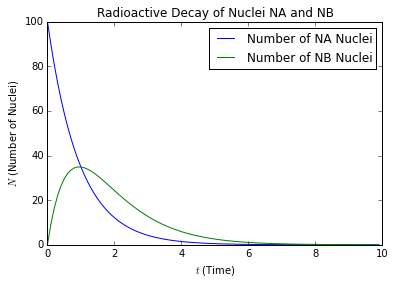

In [11]:
def nuclei_Nb(lamb_A, lamb_B, N1A, N1B, deltaT):
    N2B = (lamb_A*N1A - lamb_B*N1B)*deltaT + N1B
    
    '''This function is used to calculate the values of N2B.
    N2B changes because the NA nuclei decay into NB nuclei.'''

    return N2B




N2A_approx = np.zeros(100,float)  # Creates an empty array to store the approximate values for N2A.
N2B_approx = np.zeros(100,float)  # Creates an empty array to store the approximate values for N2B.
lamb_A = 1                        # A simple value for the lambdas to make calculations easier so 
lamb_B = 1                        # that errors in computational logic are easier to find.
N1A = 100                         # The starting number of nuclei A and B.  NB is set to zero to 
N1B = 0                           # show how it grows as NA decays.
deltaT = 0.1                      # The amount of time between each measurement.
time2 = np.zeros(100,float)       # Creates an empty array to store the time values for later graphing.
N2A_approx[0] = 100               # Stores the initial values of NA and NB.
N2B_approx[0] = 0
time2[0] = 0                      # Stores the first time as zero in the zeroth place of the time2 array.
tA = 0.1                          # The second time that is stored into the array.
deltaT = .1                       # The amount of time change between calculations.

for k in range(1, steps):                    # This for loop calculates the the values of N2A for 100 times.
    N2A = nuclei_approx(N1A,deltaT,lamb_A)   # Calls the function with the necesarry parameters.
    time2[k] = tA                            # Assigns a value to the kth spot in the time2 array.
    tA += deltaT                             # Assigns the new values of N2A to the kth position in the 
    N2A_approx[k] = N2A                      # N2 array.
    N1A = N2A
    if N2A <= 0:
        break

for m in range(1, steps):
    N2B = nuclei_Nb(lamb_A, lamb_B, N2A_approx[m], N1B, deltaT)  # This for loop does the same as the previous one,
    N2B_approx[m] = N2B                                          # but for the N2B values.
    N1B = N2B
    if N2B <= 0:
        break

fig, ax = plt.subplots()                                   # This section formats the plot, labels, and legend.
ax.set_xlabel("$t$ (Time)")                                # It is super useful, like seriously, look at that graph.
ax.set_ylabel("$N$ (Number of Nuclei)")

ax.set_title("Radioactive Decay of Nuclei NA and NB")

ax.plot(time2,N2A_approx,label="Number of NA Nuclei")
ax.plot(time2,N2B_approx,label="Number of NB Nuclei")
ax.legend()
plt.show()

The graph above shows the decay of two sets of Nuclei.  The NA nuclei, the Nuclei represented by the blue line, decay and become NB nuclei, the Nuclei represented by the green line.  The graph of the NA nuclei resembles the previous graph, showing the exponential decay of set of N radioactive nuclei.  The NB nuclei start at zero, and while the NA nuclei are rapidly decaying, the NB nuclei are rapidly increasing.  This is happening because the NB nuclei are not decaying as fast as the NA nuclei are decaying into NB nuclei.  This is what should be expected since the NA nuclei are decaying into NB nuclei.  As the rate of which the NA nuclei decay decreases, the rate of increase of the NB nuclei decreases, and then stops.  The rate at which the NB nuclei decay is slower than that of the NA nuclei because the NA nuclei are still decaying into NB nuclei.  That is why when the number of NB nuclei reaches its peak at about 37, it then has a shallow decrease.